In [7]:
#What are we watching tonight Project Template
# Imports
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')


In [8]:
# Dataframe
dataset_df = pd.read_csv("tv_shows.csv")

dataset_df = dataset_df.drop(["Unnamed: 0", "Type"], axis=1)
dataset_df.head()


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0


In [9]:
# Clean dataframe
clean_dataset_df = dataset_df.dropna(subset=["IMDb","Rotten Tomatoes"])
clean_dataset_df.head()
 

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0


In [12]:
 def convert_fraction_to_integer(value):
    parts = value.split("/")
    numerator = float(parts[0])
    denominator = float(parts[1])
    result = round((numerator / denominator) * 100)
    return result  
columns_to_convert = ["IMDb", "Rotten Tomatoes"]
for col in columns_to_convert:
    clean_dataset_df[col] = clean_dataset_df[col].apply(convert_fraction_to_integer)


clean_dataset_df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,94,100,1,0,0,0
1,2,Stranger Things,2016,16+,87,96,1,0,0,0
2,3,Attack on Titan,2013,18+,90,95,1,1,0,0
3,4,Better Call Saul,2015,18+,88,94,1,0,0,0
4,5,Dark,2017,16+,88,93,1,0,0,0


In [13]:
# For IMDb
IMDb_higher_ratings_df = clean_dataset_df.loc[(clean_dataset_df["IMDb"] >= 80)]
                             
IMDb_higher_ratings_df.head()             

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,94,100,1,0,0,0
1,2,Stranger Things,2016,16+,87,96,1,0,0,0
2,3,Attack on Titan,2013,18+,90,95,1,1,0,0
3,4,Better Call Saul,2015,18+,88,94,1,0,0,0
4,5,Dark,2017,16+,88,93,1,0,0,0


In [14]:
# For IMDb: 
count = len(IMDb_higher_ratings_df.loc[IMDb_higher_ratings_df['Netflix']==1])
print("Netfilx:", count)
count = len(IMDb_higher_ratings_df.loc[IMDb_higher_ratings_df['Hulu']==1])
print("Hulu:", count)
count = len(IMDb_higher_ratings_df.loc[IMDb_higher_ratings_df['Prime Video']==1])
print("Prime Video:", count)
count = len(IMDb_higher_ratings_df.loc[IMDb_higher_ratings_df['Disney+']==1])
print("Disney+:", count)

Netfilx: 404
Hulu: 320
Prime Video: 312
Disney+: 70


In [28]:
#For IMDb:
# Create data for the DataFrame
data = {'Services': ['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
        'IMDb_shows': [404, 320, 312, 70]}

# Create the DataFrame
IMDb_df = pd.DataFrame(data)

# Display the DataFrame
print(IMDb_df)

      Services  IMDb_shows
0      Netflix         404
1         Hulu         320
2  Prime Video         312
3      Disney+          70


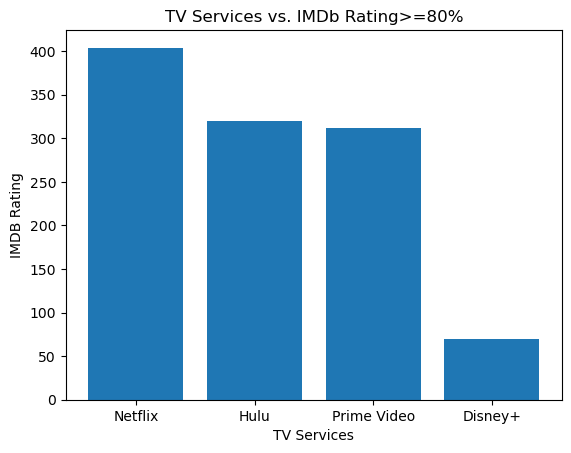

In [36]:
# For IMDb - Ploting:
x_axis = IMDb_df["Services"]
y_axis = IMDb_df["IMDb_shows"]

plt.bar(x_axis, y_axis)
plt.title("TV Services vs. IMDb Rating>=80%")
plt.xlabel("TV Services")
plt.ylabel("IMDB Rating")

plt.savefig("TV Services vs. IMDb Rating.png")

plt.show()

In [18]:
# For Rotten Tomatos
Tomatoes_higher_ratings_df = clean_dataset_df.loc[(clean_dataset_df["Rotten Tomatoes"] >= 80)]
                             
Tomatoes_higher_ratings_df.head()    

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,94,100,1,0,0,0
1,2,Stranger Things,2016,16+,87,96,1,0,0,0
2,3,Attack on Titan,2013,18+,90,95,1,1,0,0
3,4,Better Call Saul,2015,18+,88,94,1,0,0,0
4,5,Dark,2017,16+,88,93,1,0,0,0


In [19]:
# For Rotten Tomatos 
count = len(Tomatoes_higher_ratings_df.loc[Tomatoes_higher_ratings_df['Netflix']==1])
print("Netfilx:", count)
count = len(Tomatoes_higher_ratings_df.loc[Tomatoes_higher_ratings_df['Hulu']==1])
print("Hulu:", count)
count = len(Tomatoes_higher_ratings_df.loc[Tomatoes_higher_ratings_df['Prime Video']==1])
print("Prime Video:", count)
count = len(Tomatoes_higher_ratings_df.loc[Tomatoes_higher_ratings_df['Disney+']==1])
print("Disney+:", count)


Netfilx: 119
Hulu: 104
Prime Video: 62
Disney+: 12


In [20]:
# For Rotten Tomatos
# Create data for the DataFrame
data = {'Services': ['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
        'Rotten_Tomatoes_shows': [119, 104, 62, 12]}

# Create the DataFrame
Tomatoes_df = pd.DataFrame(data)

# Display the DataFrame
print(Tomatoes_df)


      Services  Rotten_Tomatoes_shows
0      Netflix                    119
1         Hulu                    104
2  Prime Video                     62
3      Disney+                     12


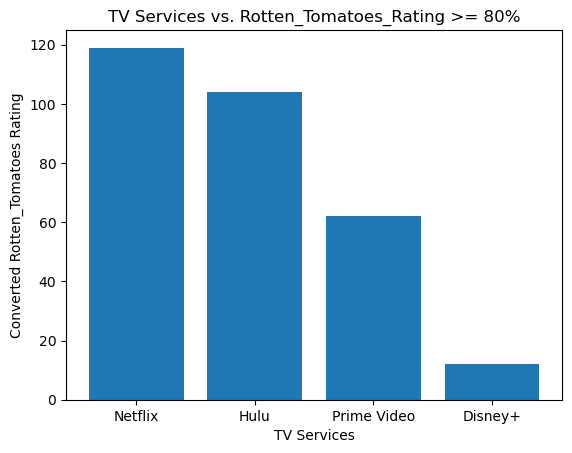

In [38]:
# For Rotten Tomatoes - Ploting:
x_axis = Tomatoes_df["Services"]
y_axis = Tomatoes_df["Rotten_Tomatoes_shows"]

plt.bar(x_axis, y_axis)
plt.title("TV Services vs. Rotten_Tomatoes_Rating >= 80%")
plt.xlabel("TV Services")
plt.ylabel("Converted Rotten_Tomatoes Rating")

plt.savefig("TV Services vs. Rotten_Tomatoes_Rating.png")


plt.show()